## Importing Basic dependencies 

In [205]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Reading the dataset

In [206]:
df = pd.read_excel(r'C:Downloads/Dataset.xlsx')

In [227]:
df.head()

,GameId,PlayerId,BackPostPass,BlockedShot,Goal,GoalAssist,OffTargetShot,OnTargetShot,PlayerOff,playerOn,...,SuccessfulPass,SuccessfulTackle,UnsuccessfulDribbling,UnsuccessfulInterception,UnsuccessfulPass,UnsuccessfulTackle,PlayerAttackingScore,PlayerDefendingScore,PlayerTeamPlayScore,PlayerTotalScore
1,350,2,0,0,1,0,3,2,4,4,...,12,3,2,2,7,3,380,140,290,810
2,350,3,1,2,1,1,3,1,2,2,...,23,2,1,0,7,2,970,200,620,1790
3,350,4,0,0,2,0,4,4,2,2,...,4,1,1,0,6,3,420,40,60,520
4,350,5,0,0,0,0,0,3,4,4,...,24,3,0,1,6,2,260,130,660,1050
6,350,7,1,1,3,2,5,3,2,2,...,21,2,3,0,5,3,850,220,580,1650


# Pre-Processing

In [208]:
#Briefing the dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1177 entries, 0 to 1176
Data columns (total 23 columns):
GameId                      1177 non-null int64
PlayerId                    1177 non-null int64
BackPostPass                1177 non-null int64
BlockedShot                 1177 non-null int64
Goal                        1177 non-null int64
GoalAssist                  1177 non-null int64
OffTargetShot               1177 non-null int64
OnTargetShot                1177 non-null int64
PlayerOff                   1177 non-null int64
playerOn                    1177 non-null int64
SavedShot                   1177 non-null int64
SuccessfulDribbling         1177 non-null int64
SuccessfulInterception      1177 non-null int64
SuccessfulPass              1177 non-null int64
SuccessfulTackle            1177 non-null int64
UnsuccessfulDribbling       1177 non-null int64
UnsuccessfulInterception    1177 non-null int64
UnsuccessfulPass            1177 non-null int64
UnsuccessfulTackle          1

In [209]:
#Checking for any null values 

df.isnull().sum()

GameId                      0
PlayerId                    0
BackPostPass                0
BlockedShot                 0
Goal                        0
GoalAssist                  0
OffTargetShot               0
OnTargetShot                0
PlayerOff                   0
playerOn                    0
SavedShot                   0
SuccessfulDribbling         0
SuccessfulInterception      0
SuccessfulPass              0
SuccessfulTackle            0
UnsuccessfulDribbling       0
UnsuccessfulInterception    0
UnsuccessfulPass            0
UnsuccessfulTackle          0
PlayerAttackingScore        0
PlayerDefendingScore        0
PlayerTeamPlayScore         0
PlayerTotalScore            0
dtype: int64

In [210]:
#Checking the skewness of the variables

df.skew()

GameId                      1.357189
PlayerId                    1.157790
BackPostPass                2.729931
BlockedShot                 2.084067
Goal                        2.486516
GoalAssist                  2.363619
OffTargetShot               1.498123
OnTargetShot                1.423265
PlayerOff                  -0.487104
playerOn                   -0.594437
SavedShot                   1.487237
SuccessfulDribbling         1.539603
SuccessfulInterception      1.203812
SuccessfulPass              0.760725
SuccessfulTackle            1.232017
UnsuccessfulDribbling       1.140982
UnsuccessfulInterception    6.101810
UnsuccessfulPass            1.522270
UnsuccessfulTackle          1.847961
PlayerAttackingScore        1.650276
PlayerDefendingScore        0.893275
PlayerTeamPlayScore         0.842910
dtype: float64

### Plotting heatmap to check the Co-relation between the variables

<AxesSubplot:>

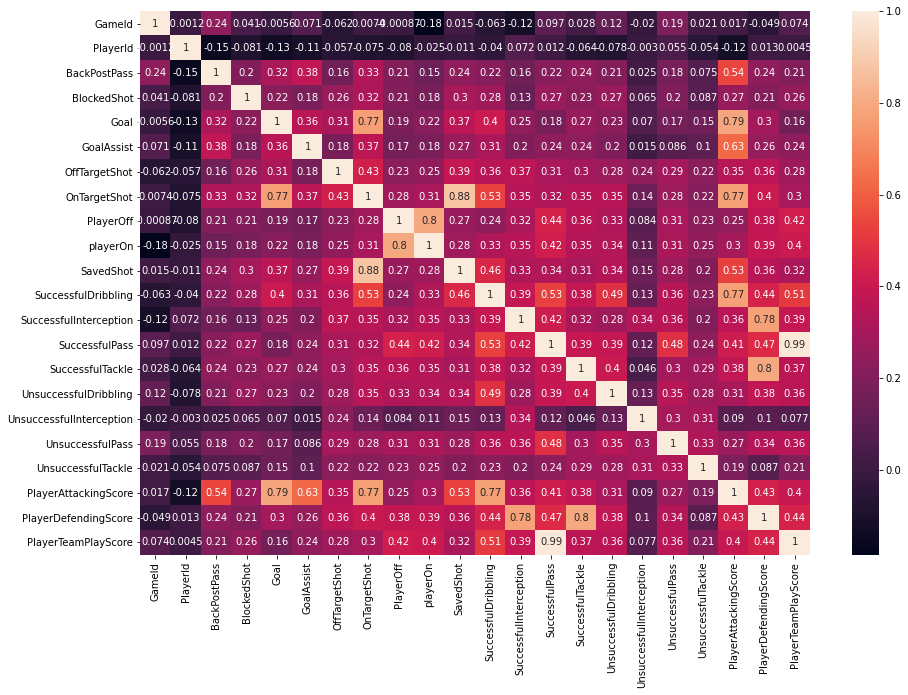

In [211]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), annot=True)

## Cleansing the dataset for training the model

In [212]:
#Replacing the value of 'PlayerTotalScore' column from zero to Null, so that we can drop them later 

df['PlayerTotalScore'].replace(0, np.nan, inplace=True)

In [213]:
df['PlayerTotalScore']= np.where(df['PlayerTotalScore'] == 'PlayerTotalScore', np.nan, df['PlayerTotalScore'])

In [214]:
#Dropping the null values

df = df.dropna()

# Splitting the dataset and Feature selection

In [216]:
X = df.drop(columns=['PlayerTotalScore', 'UnsuccessfulInterception', 'OnTargetShot'])
y = df['PlayerTotalScore']

In [217]:
#Importing different models and other dependencies 

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, accuracy_score

In [218]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [219]:
#Using Linear Regression model

model = LinearRegression()
model.fit(X_train, y_train)
pred = model.predict(X_test)
print('MSE:', mean_squared_error(y_test, pred))
print('MAE:', mean_absolute_error(y_test, pred))
print('r2:', r2_score(y_test, pred))


MSE: 9.384892978593151e-26
MAE: 2.3348365645604837e-13
r2: 1.0


In [220]:
#Using Decision Tree Regressor model

model = DecisionTreeRegressor()
model.fit(X_train, y_train)
pred = model.predict(X_test)
print('MSE:', mean_squared_error(y_test, pred))
print('MAE:', mean_absolute_error(y_test, pred))
print('r2:', r2_score(y_test, pred))


MSE: 31799.51690821256
MAE: 107.97101449275362
r2: 0.9136300771279794


In [221]:
#Using RandomForest Regressor model

model = RandomForestRegressor()
model.fit(X_train, y_train)
pred = model.predict(X_test)
print('MSE:', mean_squared_error(y_test, pred))
print('MAE:', mean_absolute_error(y_test, pred))
print('r2:', r2_score(y_test, pred))


MSE: 9339.688309178748
MAE: 54.82608695652174
r2: 0.9746326913946246
